# **Import libraries and packages**

In [1]:
import pandas as pd
import datetime
import regex as re
import math
from numpy import array
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from itertools import cycle
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

import warnings
warnings.filterwarnings('ignore')

# **Import Dataset**

In [2]:
matic = pd.read_csv('/kaggle/input/maticpolygon-crytocurrency-historical-dataset/Matic Historical Data.csv')

In [3]:
matic.head()

,Date,Open,High,Low,Close,Volume
0,2019-04-28,0.004521,0.004545,0.004317,0.004421,8408136
1,2019-04-29,0.004418,0.004492,0.003471,0.003471,8267044
2,2019-04-30,0.003462,0.005078,0.003458,0.004478,25072706
3,2019-05-01,0.004440,0.004673,0.004071,0.004374,10567352
4,2019-05-02,0.004366,0.004700,0.004096,0.004198,6714908


# **Data Preprocessing**

In [4]:
matic['Date'] = pd.to_datetime(matic.Date)

# for i in range(len(matic)):
#     matic['Price'][i] = float(re.sub(',', '', matic['Price'][i]))
#     matic['Open'][i] = float(re.sub(',', '', matic['Open'][i]))
#     matic['High'][i] = float(re.sub(',', '', matic['High'][i]))
#     matic['Low'][i] = float(re.sub(',', '', matic['Low'][i]))
#     matic['Change %'][i] = float(re.sub('%', '', matic['Change %'][i]))
#     if matic['Vol.'][i][-1] == 'K':
#         matic['Vol.'][i] = int(float(re.sub('K', '', matic['Vol.'][i])) * 1000) 
#     elif matic['Vol.'][i][-1] == 'M':
#         matic['Vol.'][i] = int(float(re.sub('M', '', matic['Vol.'][i])) * 1000000) 

matic.head()

,Date,Open,High,Low,Close,Volume
0,2019-04-28,0.004521,0.004545,0.004317,0.004421,8408136
1,2019-04-29,0.004418,0.004492,0.003471,0.003471,8267044
2,2019-04-30,0.003462,0.005078,0.003458,0.004478,25072706
3,2019-05-01,0.004440,0.004673,0.004071,0.004374,10567352
4,2019-05-02,0.004366,0.004700,0.004096,0.004198,6714908


In [5]:
matic.shape

(1295, 6)

In [6]:
print('Total number of days :', matic.Date.nunique())
print('Total number of fields :', matic.shape[1])

Total number of days : 1295
Total number of fields : 6


# **Chceking Null and NA values**

In [7]:
print("Null values :", matic.isnull().values.sum())
print("NA values :", matic.isna().values.any())

Null values : 0
NA values : False


# **Finding out the duration of dataset**

In [8]:
print("Starting date :", matic.iloc[0][0])
print("Ending date :", matic.iloc[-1][0])
print("Duration :", matic.iloc[-1][0]- matic.iloc[0][0])

Starting date : 2019-04-28 00:00:00
Ending date : 2022-11-12 00:00:00
Duration : 1294 days 00:00:00


# **EDA**

# **Monthwise Analysis for the year 2022**

In [9]:
y_2022 = matic[matic['Date'] >= '2022-01-01']
y_2022 = y_2022.drop(['Volume'], axis = 1)
y_2022.reset_index(drop = True, inplace = True)
y_2022.head()

,Date,Open,High,Low,Close
0,2022-01-01,2.527818,2.601468,2.511482,2.574791
1,2022-01-02,2.574261,2.576642,2.509071,2.549190
2,2022-01-03,2.549156,2.549941,2.388141,2.432652
3,2022-01-04,2.434234,2.500873,2.363126,2.367248
4,2022-01-05,2.367199,2.447287,2.056368,2.195475


In [10]:
monthwise = y_2022.groupby(pd.DatetimeIndex(y_2022.Date).month)[['Open', 'Close', 'High', 'Low']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November']
monthwise = monthwise.reset_index()
monthwise['Date'] = new_order
#monthwise.index = new_order
monthwise

,Date,Open,Close,High,Low
0,January,2.051328,2.022779,2.127725,1.939756
1,February,1.662476,1.661469,1.729543,1.586958
2,March,1.518553,1.518790,1.562384,1.482534
3,April,1.427907,1.408560,1.461532,1.379722
4,May,0.782830,0.770518,0.818652,0.733169
5,June,0.524504,0.518362,0.549364,0.492573
6,July,0.705693,0.720221,0.750041,0.675645
7,August,0.874938,0.871830,0.901774,0.849418
8,September,0.817986,0.816466,0.840067,0.793467
9,October,0.839503,0.843617,0.860406,0.824043


In [11]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = monthwise.Date,
    y = monthwise['Close'],
    name = 'Stock Close Price',
    marker_color = 'purple'
))

fig.add_trace(go.Bar(
    x = monthwise.Date,
    y = monthwise['Open'],
    name = 'Stock Open Price',
    marker_color = 'pink'
))
fig.update_layout(barmode = 'group', xaxis_tickangle = -45, 
                  title = 'Monthwise comparision for Open and Close Prices for the year 2022')
fig.show()

# **Monthwise comparision for High and Low prices**

In [12]:
monthwise_high = y_2022.groupby(pd.DatetimeIndex(y_2022.Date).month)['High'].max()
monthwise_high = monthwise_high.reset_index()
monthwise_high['Date'] = new_order

monthwise_low = y_2022.groupby(pd.DatetimeIndex(y_2022.Date).month)['Low'].min()
monthwise_low = monthwise_low.reset_index()
monthwise_low['Date'] = new_order

In [13]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = monthwise_high.Date,
    y = monthwise_high.High,
    name = 'Matic High Price',
    marker_color = 'purple'
))
fig.add_trace(go.Bar(
    x = monthwise_low.Date,
    y = monthwise_low.Low,
    name = 'Matic Low Price',
    marker_color='pink'
))

fig.update_layout(barmode='group', xaxis_tickangle = -45,
                  title=' Monthwise Matic High and Low Prices for the year 2022')
fig.show()

# **Trend comparision between open, high and low prices**

In [14]:
names = cycle(['Matic Open Price','Matic High Price','Matic Low Price'])

fig = px.line(monthwise, x = monthwise.Date, y = [monthwise['Open'], monthwise['High'], monthwise['Low']],
             labels = {'date': 'Date','value':'Matic value'})
fig.update_layout(title_text = 'Matic Price analysis chart', font_size = 15, font_color = 'black',legend_title_text='Matic Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)

fig.show()

# Monthwise Analysis for the year 2021

In [15]:
y_2021 = matic[(matic['Date'] >= '2021-01-01') & (matic['Date'] < '2022-01-01')]
y_2021 = y_2021.drop(['Volume'], axis = 1)
y_2021.reset_index(drop = True, inplace = True)
y_2021.head()

,Date,Open,High,Low,Close
0,2021-01-01,0.017633,0.018774,0.017454,0.017812
1,2021-01-02,0.017812,0.019600,0.017331,0.019043
2,2021-01-03,0.019053,0.020570,0.018910,0.019975
3,2021-01-04,0.020000,0.024831,0.019763,0.024614
4,2021-01-05,0.024675,0.027025,0.023680,0.024467


In [16]:
monthwise = y_2021.groupby(pd.DatetimeIndex(y_2021.Date).month)[['Open', 'Close', 'High', 'Low']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthwise = monthwise.reset_index()
monthwise['Date'] = new_order
#monthwise.index = new_order
monthwise

,Date,Open,Close,High,Low
0,January,0.031312,0.031986,0.034512,0.029142
1,February,0.109207,0.116056,0.128579,0.099358
2,March,0.323199,0.327732,0.356862,0.307135
3,April,0.424232,0.439692,0.469618,0.394216
4,May,1.341641,1.376569,1.548610,1.151419
5,June,1.412108,1.385949,1.482881,1.311484
6,July,0.983595,0.981046,1.023492,0.938278
7,August,1.326018,1.334389,1.397587,1.272405
8,September,1.315239,1.309145,1.380807,1.236145
9,October,1.467900,1.493854,1.560371,1.413099


In [17]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = monthwise_high.Date,
    y = monthwise_high.High,
    name = 'Matic High Price',
    marker_color = 'purple'
))
fig.add_trace(go.Bar(
    x = monthwise_low.Date,
    y = monthwise_low.Low,
    name = 'Matic Low Price',
    marker_color='pink'
))

fig.update_layout(barmode='group', xaxis_tickangle = -45,
                  title=' Monthwise Matic High and Low Prices for 2021')
fig.show()

In [18]:
names = cycle(['Matic Open Price','Matic High Price','Matic Low Price'])

fig = px.line(monthwise, x = monthwise.Date, y = [monthwise['Open'], monthwise['High'], monthwise['Low']],
             labels = {'date': 'Date','value':'Matic value'})
fig.update_layout(title_text = 'Matic Price analysis chart for 2021', font_size = 15, font_color = 'black',legend_title_text='Matic Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)

fig.show()

# **Monthwise Analysis for the Year 2020**

In [19]:
y_2020 = matic[(matic['Date'] >= '2020-01-01') & (matic['Date'] < '2021-01-01')]
y_2020 = y_2020.drop(['Volume'], axis = 1)
y_2020.reset_index(drop = True, inplace = True)
y_2020.head()

,Date,Open,High,Low,Close
0,2020-01-01,0.013807,0.015474,0.013747,0.014962
1,2020-01-02,0.014942,0.015759,0.014441,0.014651
2,2020-01-03,0.014694,0.015427,0.014297,0.015194
3,2020-01-04,0.015170,0.015523,0.014865,0.014961
4,2020-01-05,0.014954,0.015278,0.014837,0.014914


In [20]:
monthwise = y_2020.groupby(pd.DatetimeIndex(y_2020.Date).month)[['Open', 'Close', 'High', 'Low']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November','December']
monthwise = monthwise.reset_index()
monthwise['Date'] = new_order
#monthwise.index = new_order
monthwise.head()

,Date,Open,Close,High,Low
0,January,0.015990,0.016126,0.016566,0.015567
1,February,0.020992,0.021084,0.021976,0.020069
2,March,0.015055,0.014752,0.016227,0.013789
3,April,0.013030,0.013181,0.013626,0.012645
4,May,0.019522,0.019689,0.020730,0.018654


In [21]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = monthwise.Date,
    y = monthwise['Close'],
    name = 'Matic Close Price',
    marker_color = 'purple'
))

fig.add_trace(go.Bar(
    x = monthwise.Date,
    y = monthwise['Open'],
    name = 'Matic Open Price',
    marker_color = 'pink'
))
fig.update_layout(barmode = 'group', xaxis_tickangle = -45, 
                  title = 'Monthwise comparision for Open and Close Prices for the year 2020')
fig.show()

In [22]:
names = cycle(['Matic Open Price','Matic High Price','Matic Low Price'])

fig = px.line(monthwise, x = monthwise.Date, y = [monthwise['Open'], monthwise['High'], monthwise['Low']],
             labels = {'date': 'Date','value':'Matic value'})
fig.update_layout(title_text = 'Matic Price analysis chart for 2020', font_size = 15, font_color = 'black',legend_title_text='Matic Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)

fig.show()

# **Monthwise Analysis for the year 2019**

In [23]:
y_2019 = matic[matic['Date'] < '2020-01-01']
y_2019 = y_2019.drop(['Volume'], axis = 1)
y_2019.reset_index(drop = True, inplace = True)
y_2019.head()

,Date,Open,High,Low,Close
0,2019-04-28,0.004521,0.004545,0.004317,0.004421
1,2019-04-29,0.004418,0.004492,0.003471,0.003471
2,2019-04-30,0.003462,0.005078,0.003458,0.004478
3,2019-05-01,0.004440,0.004673,0.004071,0.004374
4,2019-05-02,0.004366,0.004700,0.004096,0.004198


In [24]:
monthwise = y_2019.groupby(pd.DatetimeIndex(y_2019.Date).month)[['Open', 'Close', 'High', 'Low']].mean()
new_order = ['April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November','December']
monthwise = monthwise.reset_index()
monthwise['Date'] = new_order
#monthwise.index = new_order
monthwise.head()

,Date,Open,Close,High,Low
0,April,0.004134,0.004123,0.004705,0.003749
1,May,0.013119,0.013696,0.015899,0.011728
2,June,0.022061,0.022059,0.023646,0.020805
3,July,0.015062,0.014715,0.015714,0.014106
4,August,0.013944,0.013968,0.015131,0.013138


In [25]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = monthwise.Date,
    y = monthwise['Close'],
    name = 'Matic Close Price',
    marker_color = 'purple'
))

fig.add_trace(go.Bar(
    x = monthwise.Date,
    y = monthwise['Open'],
    name = 'Matic Open Price',
    marker_color = 'pink'
))
fig.update_layout(barmode = 'group', xaxis_tickangle = -45, 
                  title = 'Monthwise comparision for Open and Close Prices for the year 2019')
fig.show()

In [26]:
names = cycle(['Matic Open Price','Matic High Price','Matic Low Price'])

fig = px.line(monthwise, x = monthwise.Date, y = [monthwise['Open'], monthwise['High'], monthwise['Low']],
             labels = {'date': 'Date','value':'Matic value'})
fig.update_layout(title_text = 'Matic Price analysis chart for 2019', font_size = 15, font_color = 'black',legend_title_text='Matic Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)

fig.show()

# **Overall Monthwise Analysis for the entire dataset**

In [27]:
monthwise = matic.groupby(pd.DatetimeIndex(matic.Date).month)[['Open', 'Close', 'High', 'Low']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November','December']
monthwise = monthwise.reset_index()
monthwise['Date'] = new_order
#monthwise.index = new_order
monthwise.head()

,Date,Open,Close,High,Low
0,January,0.699543,0.690297,0.726268,0.661488
1,February,0.590775,0.592731,0.619585,0.562339
2,March,0.618936,0.620425,0.645158,0.601152
3,April,0.601801,0.600595,0.627499,0.576438
4,May,0.539278,0.545118,0.600973,0.478742


In [28]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = monthwise.Date,
    y = monthwise['Close'],
    name = 'Stock Close Price',
    marker_color = 'purple'
))

fig.add_trace(go.Bar(
    x = monthwise.Date,
    y = monthwise['Open'],
    name = 'Stock Open Price',
    marker_color = 'pink'
))
fig.update_layout(barmode = 'group', xaxis_tickangle = -45, 
                  title = "Monthwise comparision for Open and Close Prices since Matic's Inception")
fig.show()

In [29]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = monthwise_high.Date,
    y = monthwise_high.High,
    name = 'Matic High Price',
    marker_color = 'purple'
))
fig.add_trace(go.Bar(
    x = monthwise_low.Date,
    y = monthwise_low.Low,
    name = 'Matic Low Price',
    marker_color='pink'
))

fig.update_layout(barmode = 'group', xaxis_tickangle = -45,
                  title = "Monthwise Matic High and Low Prices since it's inception")
fig.show()

In [30]:
names = cycle(['Matic Open Price','Matic High Price','Matic Low Price'])

fig = px.line(monthwise, x = monthwise.Date, y = [monthwise['Open'], monthwise['High'], monthwise['Low']],
             labels = {'date': 'Date','value':'Matic value'})
fig.update_layout(title_text = 'Matic Price analysis chart (overall)', font_size = 15, font_color = 'black',legend_title_text='Matic Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)

fig.show()

# **Preparing Matic Closed Prices**

In [31]:
closed_matic = matic[['Date', 'Close']]
print(closed_matic.shape)
closed_matic.head()

(1295, 2)


,Date,Close
0,2019-04-28,0.004421
1,2019-04-29,0.003471
2,2019-04-30,0.004478
3,2019-05-01,0.004374
4,2019-05-02,0.004198


In [32]:
fig = px.line(closed_matic, x = closed_matic.Date, y = closed_matic.Close,labels = {'date':'Date','close':'Close Price'})
fig.update_traces(marker_line_width = 2, opacity = 0.8)
fig.update_layout(title_text = 'Matic close price chart', plot_bgcolor = 'white', font_size = 15, font_color = 'black')
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.show()

# **Considering only last 1 year data for prediction purposes.**

In [33]:
closed_matic = closed_matic[closed_matic['Date'] > '2021-11-12']
closed_stock = closed_matic.copy()
print("Total data for prediction :", closed_stock.shape[0])

Total data for prediction : 365


In [34]:
fig = px.line(closed_matic, x = closed_matic.Date, y = closed_matic.Close, labels = {'Date':'Date','Close':'Close Matic Price'})
fig.update_traces(marker_line_width = 2, opacity = 0.8, marker_line_color = 'orange')
fig.update_layout(title_text = 'Considered period to predict Matic close price', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.show()

# **Normalizing Open Price**

In [35]:
del closed_matic['Date']
scaler = MinMaxScaler(feature_range = (0,1))
closed_matic = scaler.fit_transform(np.array(closed_matic).reshape(-1,1))
print(closed_matic.shape)

(365, 1)


# **Preparing data for train and test**

In [36]:
train_size = int(len(closed_matic)*0.7)
test_size = len(closed_matic) - train_size
train_data , test_data = closed_matic[0:train_size, :] ,closed_matic[train_size:len(closed_matic),:1]
print("Train_data :", train_data.shape)
print("Test_data :", test_data.shape)

Train_data : (255, 1)
Test_data : (110, 1)


# **Converting Open price based on Time Series Forecasting requirement**

In [37]:
#Converting the array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]    
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [38]:
time_step = 15
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", x_test.shape)
print("y_test", y_test.shape)

X_train:  (239, 15)
y_train:  (239,)
X_test:  (94, 15)
y_test (94,)


# **Model Building (GRU)**


****
GRUs (Gated Recurrent Units) are very similar to Long Short Term Memory(LSTM). Just like LSTM, GRU uses gates to control the flow of information. They are relatively new as compared to LSTM. This is the reason they offer some improvement over LSTM and have simpler architecture.
****

In [39]:
#Reshaping input to be of format [samples, time steps, features] which is reuqired for LSTM
x_train_lstm = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_lstm = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

print(x_train_lstm.shape, x_test_lstm.shape)

(239, 15, 1) (94, 15, 1)


In [40]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(GRU(128, return_sequences = True, input_shape = (time_step, 1)))
model.add(GRU(128, return_sequences = True))
model.add(GRU(128))
model.add(Dropout(0.20))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 128)           50304     
                                                                 
 gru_1 (GRU)                 (None, 15, 128)           99072     
                                                                 
 gru_2 (GRU)                 (None, 128)               99072     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 248,577
Trainable params: 248,577
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(x_train_lstm, y_train, validation_data = (x_test_lstm, y_test), epochs = 300, batch_size = 32, verbose = 1)

Epoch 1/300
8/8 [==============================] - 9s 247ms/step - loss: 0.0697 - val_loss: 0.0012
Epoch 2/300
8/8 [==============================] - 0s 61ms/step - loss: 0.0256 - val_loss: 0.0086
Epoch 3/300
8/8 [==============================] - 0s 58ms/step - loss: 0.0112 - val_loss: 8.4442e-04
Epoch 4/300
8/8 [==============================] - 0s 60ms/step - loss: 0.0084 - val_loss: 0.0013
Epoch 5/300
8/8 [==============================] - 0s 59ms/step - loss: 0.0053 - val_loss: 0.0016
Epoch 6/300
8/8 [==============================] - 0s 57ms/step - loss: 0.0049 - val_loss: 8.3566e-04
Epoch 7/300
8/8 [==============================] - 0s 57ms/step - loss: 0.0048 - val_loss: 9.4980e-04
Epoch 8/300
8/8 [==============================] - 0s 59ms/step - loss: 0.0040 - val_loss: 8.1093e-04
Epoch 9/300
8/8 [==============================] - 0s 58ms/step - loss: 0.0035 - val_loss: 8.8301e-04
Epoch 10/300
8/8 [==============================] - 0s 60ms/step - loss: 0.0034 - val_loss: 7.730

# **Plotting loss charts**

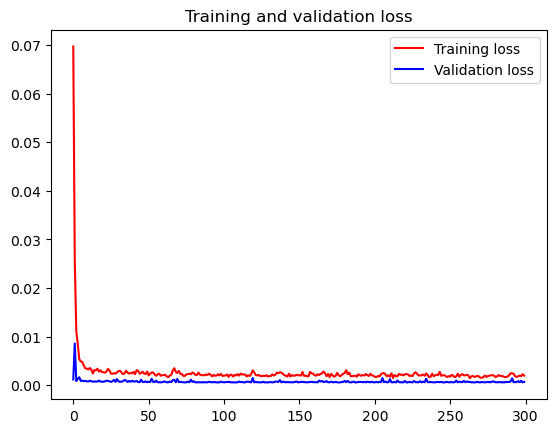

<Figure size 640x480 with 0 Axes>

In [43]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [44]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
print(train_predict.shape, test_predict.shape)

3/3 [==============================] - 0s 19ms/step
(239, 1) (94, 1)


# **Model Evaluation**

In [45]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

**Evaluation metrics : RMSE, MSE, MAE**

In [46]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.09995301704574489
Train data MSE:  0.009990605616546968
Train data MAE:  0.07128607939975531
-------------------------------------------------------------------------------------
Test data RMSE:  0.06482065927119635
Test data MSE:  0.004201717868352533
Test data MAE:  0.04096258701162135


# **Explained Variance Regression Score:**


****
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.
****

In [47]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9786805414418349
Test data explained variance regression score: 0.6528765417291393


# **R2 score for regression:**

****
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
****

In [48]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9752493424678823
Test data R2 score: 0.5981184674095945


**Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)**

In [49]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.005243717980119442
Test data MGD:  0.004986389661583582
----------------------------------------------------------------------
Train data MPD:  0.006350771313577625
Test data MPD:  0.004542051639747711


# **Comparison of original Matic open price and predicted Matic open price**

In [50]:
look_back = time_step
train_predict_plot = np.empty_like(closed_matic)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back : len(train_predict) + look_back, :] = train_predict
print("Train predicted data: ", train_predict_plot.shape)

# shift test predictions for plotting
test_predict_plot = np.empty_like(closed_matic)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1:len(closed_stock) - 1, :] = test_predict
print("Test predicted data: ", test_predict_plot.shape)

names = cycle(['Original Close price','Train predicted Close price','Test predicted Close price'])

plotdf = pd.DataFrame({'Date': closed_stock['Date'],
                       'original_close': closed_stock['Close'],
                      'train_predicted_close': train_predict_plot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': test_predict_plot.reshape(1,-1)[0].tolist()})
plotdf['original_close'] = plotdf['original_close'].astype(np.float64)

fig = px.line(plotdf, x = plotdf['Date'], y = [plotdf['original_close'], plotdf['train_predicted_close'], plotdf['test_predicted_close']],
              labels = {'value':'Matic price','Date': 'Date'})
fig.update_layout(title_text = 'Comparision between original Close price vs predicted Close price',
                  plot_bgcolor = 'white', font_size = 15, font_color = 'black', legend_title_text = 'Open Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


# **Predicting for the next 30 days**

In [51]:
x_input = test_data[len(test_data) - time_step:].reshape(1,-1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = time_step
i = 0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


# **Plotting last 15 days of dataset and next predicted 30 days**

In [52]:
last_days = np.arange(1,time_step + 1)
day_pred = np.arange(time_step + 1,time_step + pred_days + 1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [53]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closed_matic[len(closed_matic)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days Open price','Predicted next 30 days Open price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Matic price','index': 'Timestamp'})
fig.update_layout(title_text='Comparing last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# **Plotting entire Opening Stock Price with next 30 days period of prediction**

In [54]:
lstmdf = closed_matic.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf = scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()